# Cat Recognition Model

This notebook demonstrates a cat recognition model similar to the project in Coursera's Neural Networks and Deep Learning class.
However, since it is not allowed to share the codes written in Python from scratch, this model will be created using Tensorflow.

To start, let's import the libraries needed:

In [5]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt

## Explore the dataset

This is how the dataset is loaded from the H5 files.

In [14]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # training images
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # training labels (cat or not a cat)

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test images
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test labels (cat or not a cat)

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

Here are the images from the training set.

idx(0) y(0) : non-cat


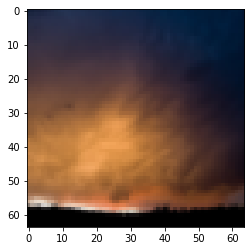

idx(1) y(0) : non-cat


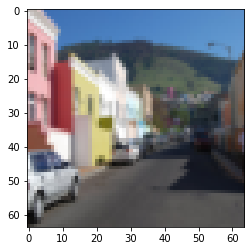

idx(2) y(1) : cat


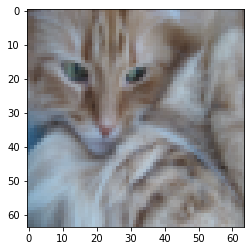

idx(3) y(0) : non-cat


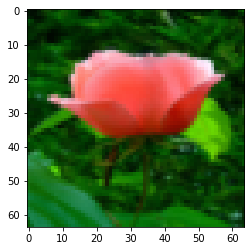

idx(4) y(0) : non-cat


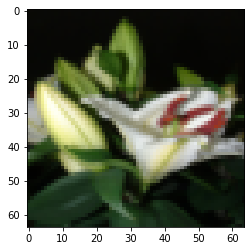

idx(5) y(0) : non-cat


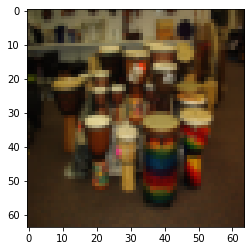

idx(6) y(0) : non-cat


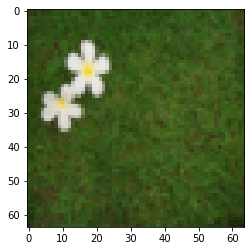

idx(7) y(1) : cat


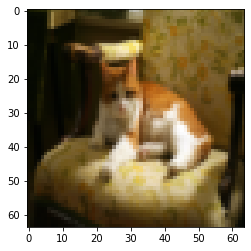

idx(8) y(0) : non-cat


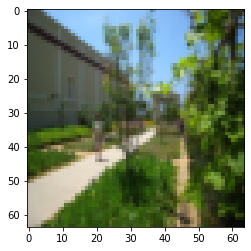

idx(9) y(0) : non-cat


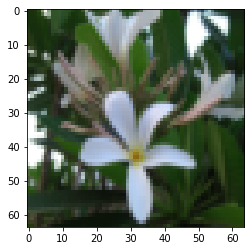

idx(10) y(0) : non-cat


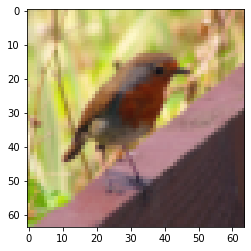

idx(11) y(1) : cat


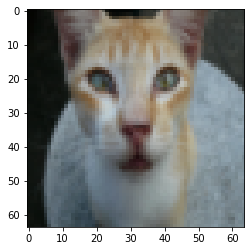

idx(12) y(0) : non-cat


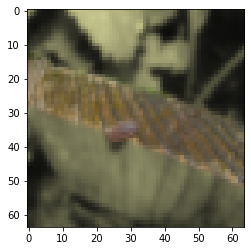

idx(13) y(1) : cat


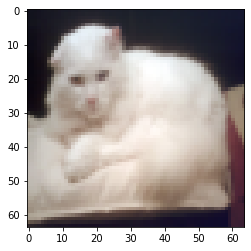

idx(14) y(1) : cat


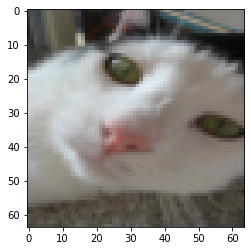

idx(15) y(0) : non-cat


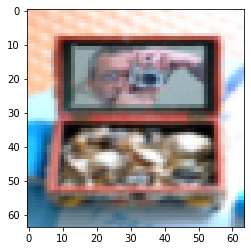

idx(16) y(0) : non-cat


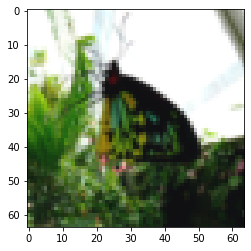

idx(17) y(0) : non-cat


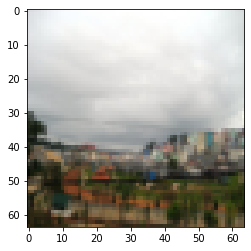

idx(18) y(0) : non-cat


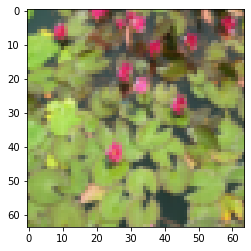

idx(19) y(1) : cat


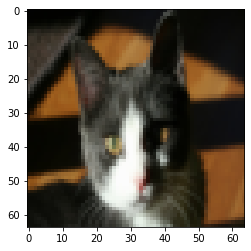

idx(20) y(0) : non-cat


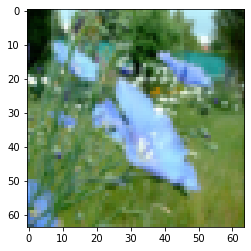

idx(21) y(0) : non-cat


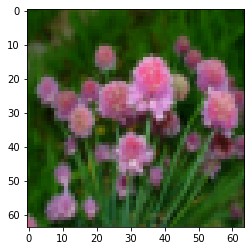

idx(22) y(0) : non-cat


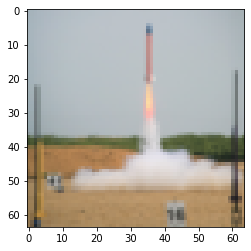

idx(23) y(0) : non-cat


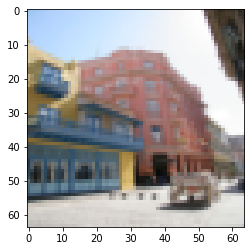

idx(24) y(1) : cat


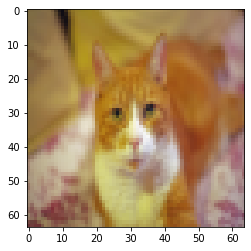

idx(25) y(1) : cat


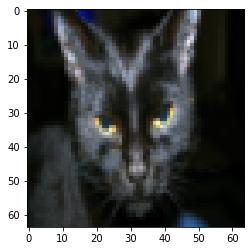

idx(26) y(0) : non-cat


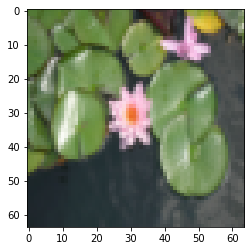

idx(27) y(1) : cat


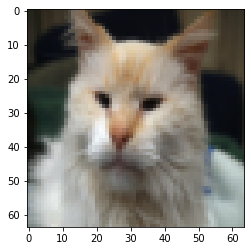

idx(28) y(0) : non-cat


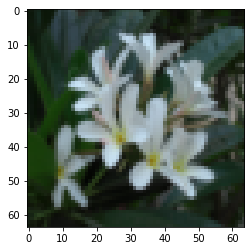

idx(29) y(1) : cat


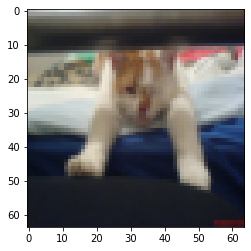

idx(30) y(0) : non-cat


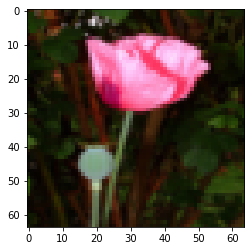

idx(31) y(0) : non-cat


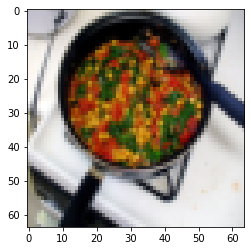

idx(32) y(0) : non-cat


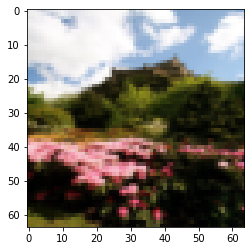

idx(33) y(0) : non-cat


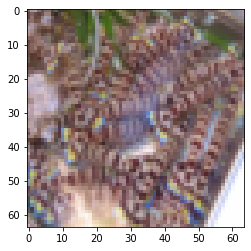

idx(34) y(0) : non-cat


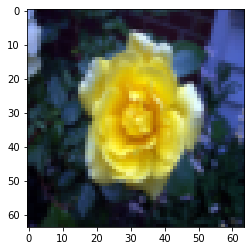

idx(35) y(0) : non-cat


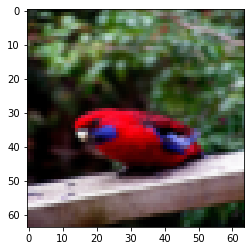

idx(36) y(0) : non-cat


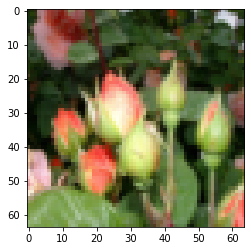

idx(37) y(0) : non-cat


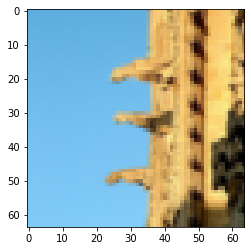

idx(38) y(1) : cat


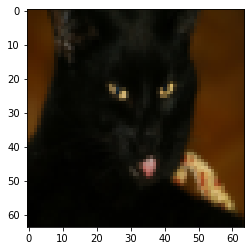

idx(39) y(0) : non-cat


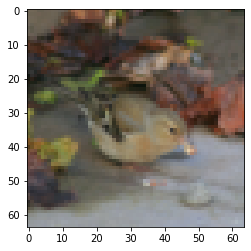

idx(40) y(0) : non-cat


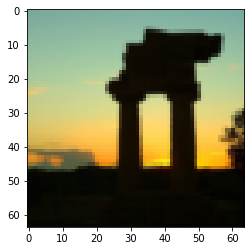

idx(41) y(1) : cat


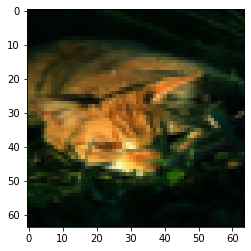

idx(42) y(1) : cat


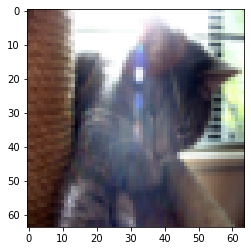

idx(43) y(0) : non-cat


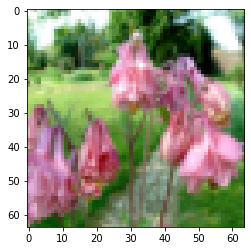

idx(44) y(0) : non-cat


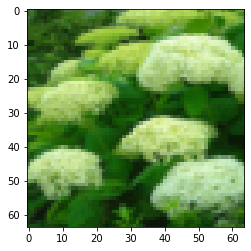

idx(45) y(0) : non-cat


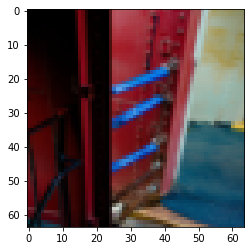

idx(46) y(0) : non-cat


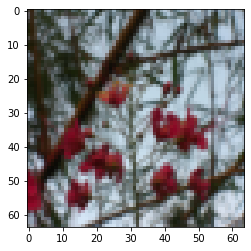

idx(47) y(1) : cat


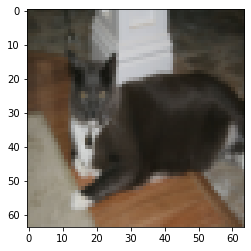

idx(48) y(0) : non-cat


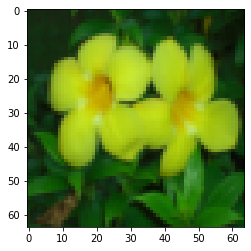

idx(49) y(0) : non-cat


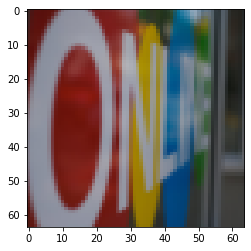

idx(50) y(1) : cat


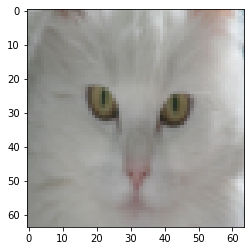

idx(51) y(0) : non-cat


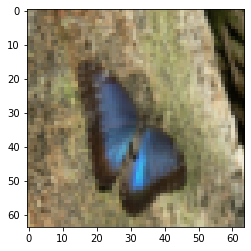

idx(52) y(0) : non-cat


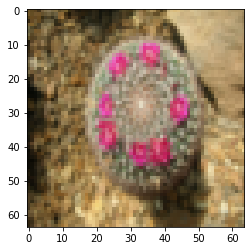

idx(53) y(0) : non-cat


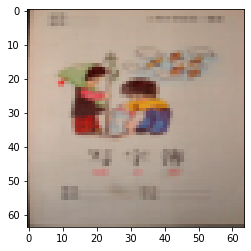

idx(54) y(1) : cat


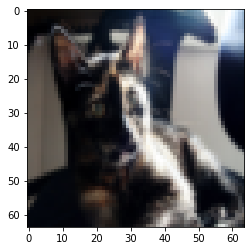

idx(55) y(0) : non-cat


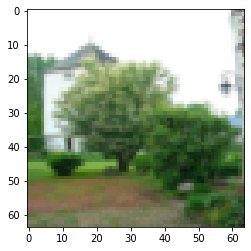

idx(56) y(1) : cat


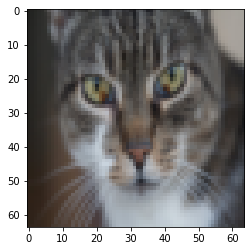

idx(57) y(1) : cat


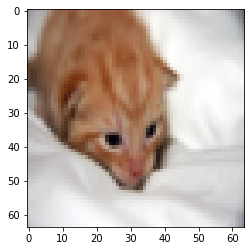

idx(58) y(0) : non-cat


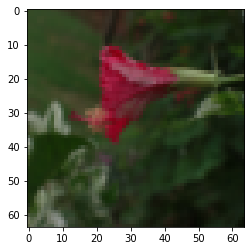

idx(59) y(1) : cat


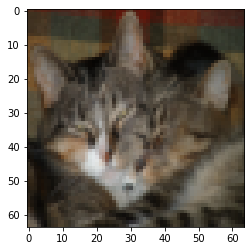

idx(60) y(1) : cat


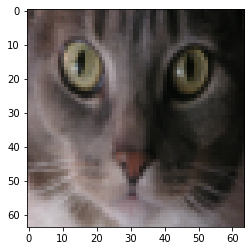

idx(61) y(1) : cat


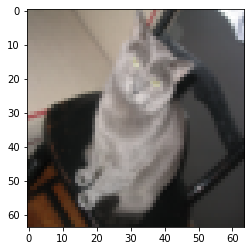

idx(62) y(0) : non-cat


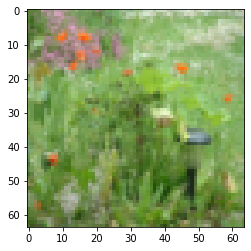

idx(63) y(0) : non-cat


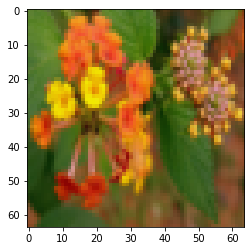

idx(64) y(0) : non-cat


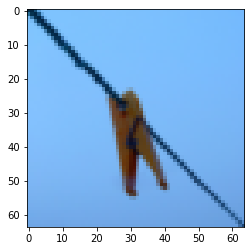

idx(65) y(0) : non-cat


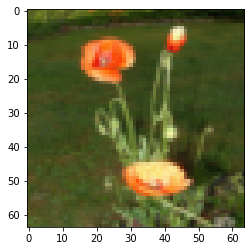

idx(66) y(0) : non-cat


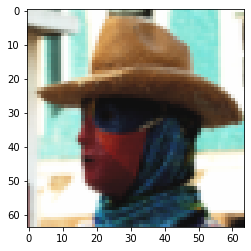

idx(67) y(0) : non-cat


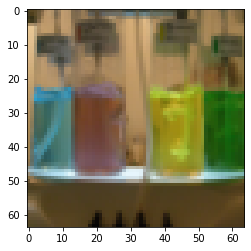

idx(68) y(1) : cat


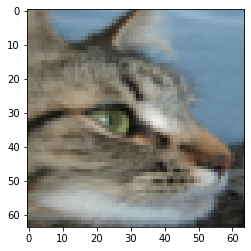

idx(69) y(0) : non-cat


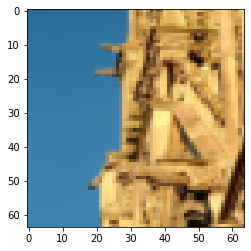

idx(70) y(0) : non-cat


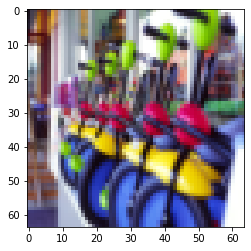

idx(71) y(1) : cat


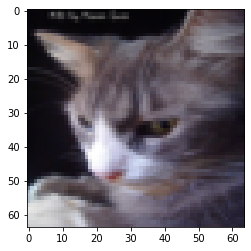

idx(72) y(0) : non-cat


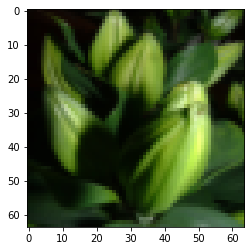

idx(73) y(0) : non-cat


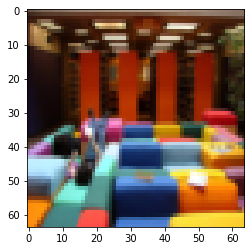

idx(74) y(0) : non-cat


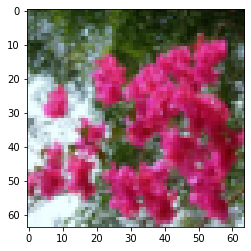

idx(75) y(0) : non-cat


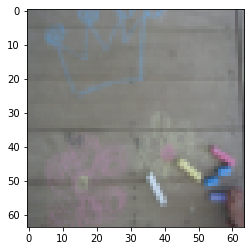

idx(76) y(0) : non-cat


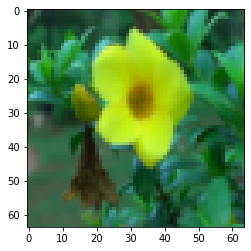

idx(77) y(0) : non-cat


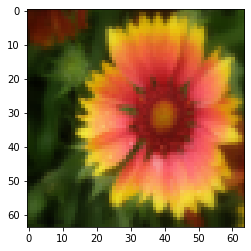

idx(78) y(0) : non-cat


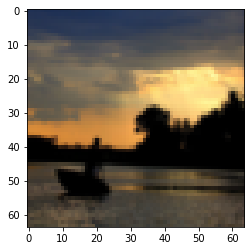

idx(79) y(0) : non-cat


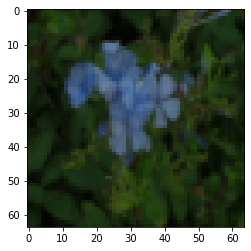

idx(80) y(0) : non-cat


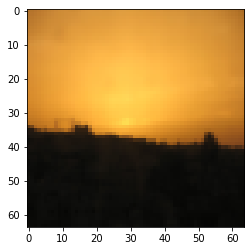

idx(81) y(0) : non-cat


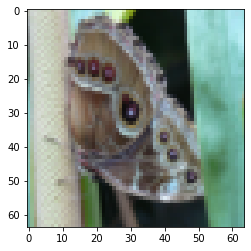

idx(82) y(0) : non-cat


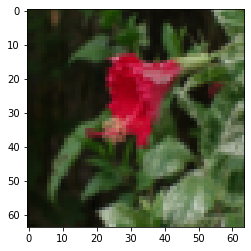

idx(83) y(1) : cat


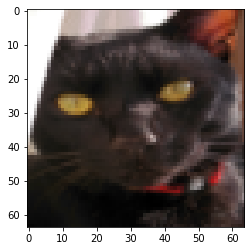

idx(84) y(1) : cat


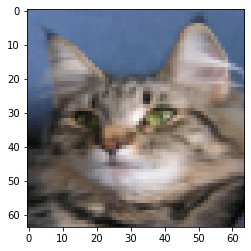

idx(85) y(0) : non-cat


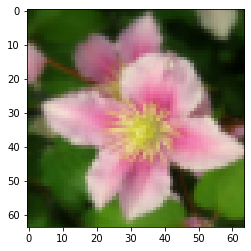

idx(86) y(0) : non-cat


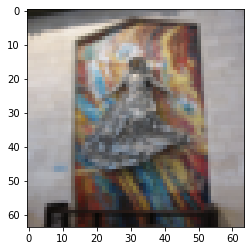

idx(87) y(0) : non-cat


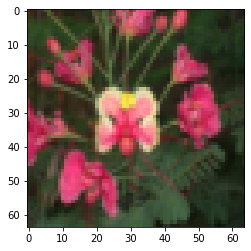

idx(88) y(1) : cat


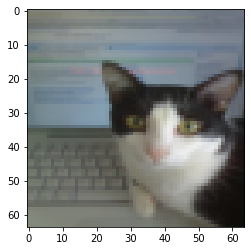

idx(89) y(0) : non-cat


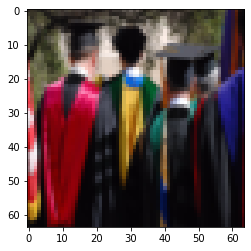

idx(90) y(0) : non-cat


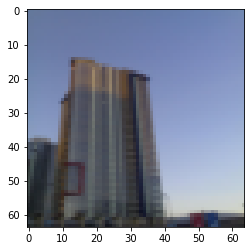

idx(91) y(0) : non-cat


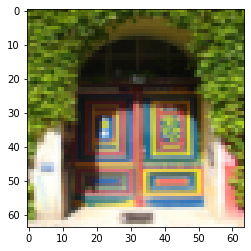

idx(92) y(1) : cat


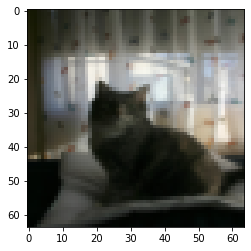

idx(93) y(1) : cat


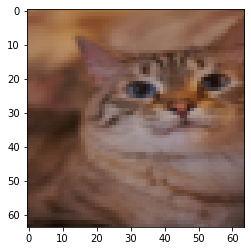

idx(94) y(1) : cat


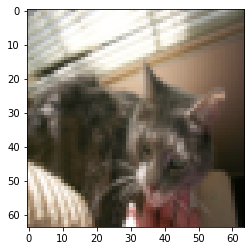

idx(95) y(0) : non-cat


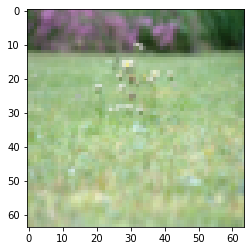

idx(96) y(0) : non-cat


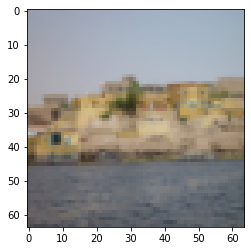

idx(97) y(1) : cat


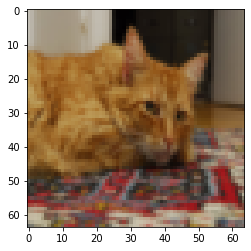

idx(98) y(0) : non-cat


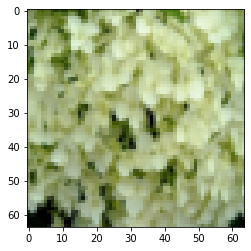

idx(99) y(0) : non-cat


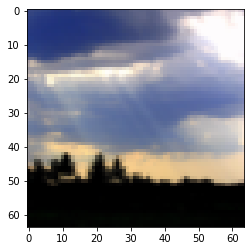

idx(100) y(0) : non-cat


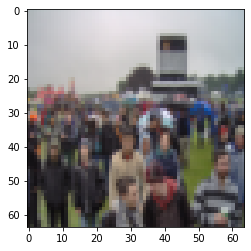

idx(101) y(0) : non-cat


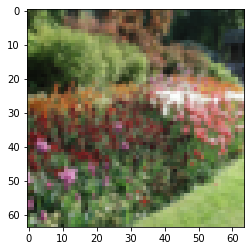

idx(102) y(1) : cat


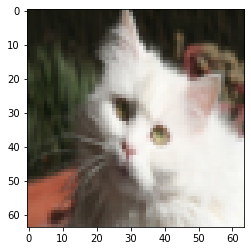

idx(103) y(0) : non-cat


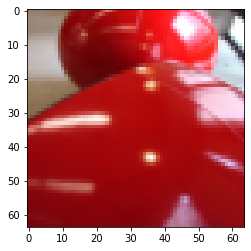

idx(104) y(1) : cat


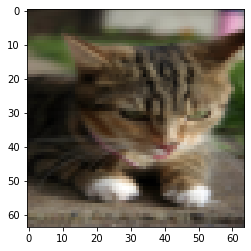

idx(105) y(0) : non-cat


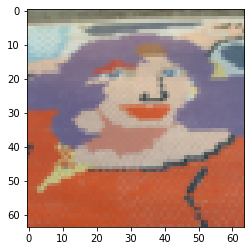

idx(106) y(1) : cat


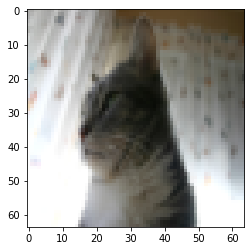

idx(107) y(1) : cat


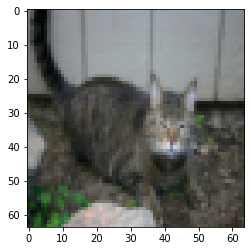

idx(108) y(1) : cat


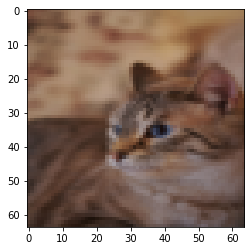

idx(109) y(1) : cat


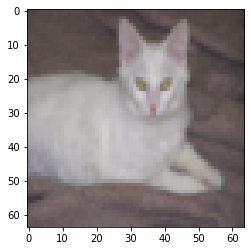

idx(110) y(1) : cat


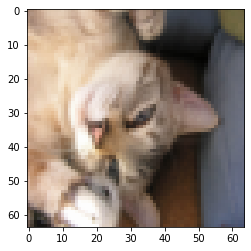

idx(111) y(1) : cat


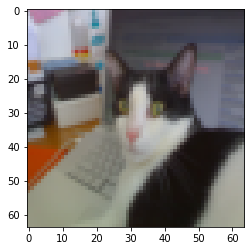

idx(112) y(0) : non-cat


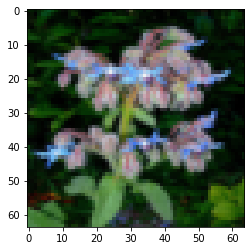

idx(113) y(0) : non-cat


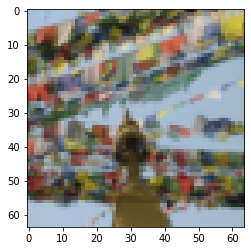

idx(114) y(0) : non-cat


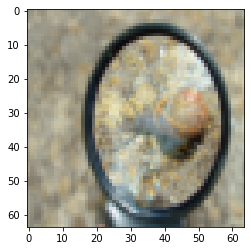

idx(115) y(0) : non-cat


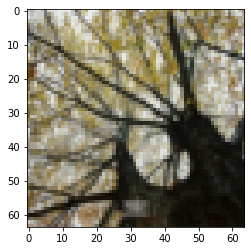

idx(116) y(0) : non-cat


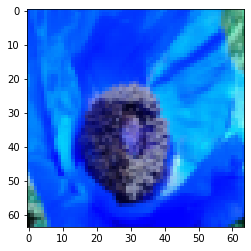

idx(117) y(1) : cat


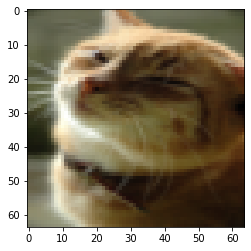

idx(118) y(0) : non-cat


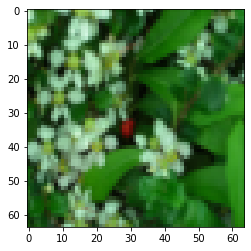

idx(119) y(0) : non-cat


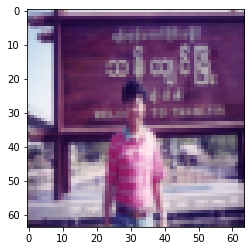

idx(120) y(0) : non-cat


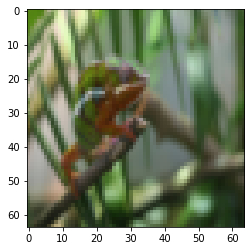

idx(121) y(1) : cat


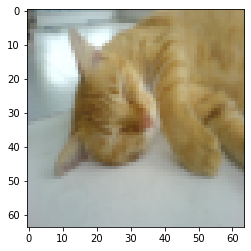

idx(122) y(0) : non-cat


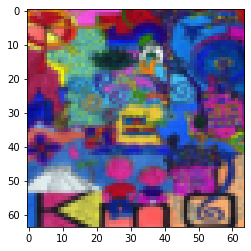

idx(123) y(0) : non-cat


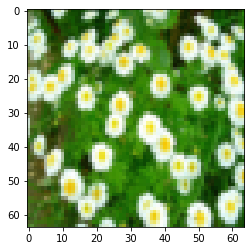

idx(124) y(1) : cat


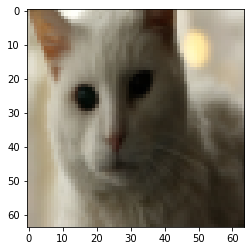

idx(125) y(0) : non-cat


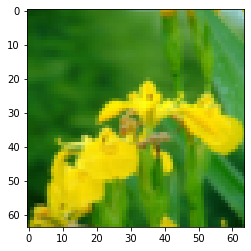

idx(126) y(1) : cat


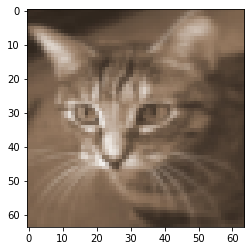

idx(127) y(0) : non-cat


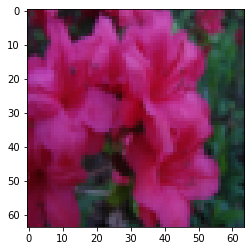

idx(128) y(1) : cat


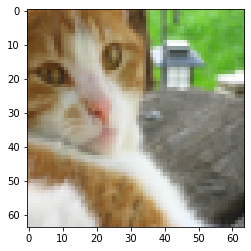

idx(129) y(1) : cat


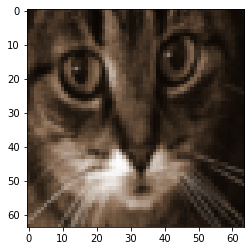

idx(130) y(0) : non-cat


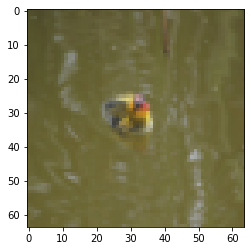

idx(131) y(0) : non-cat


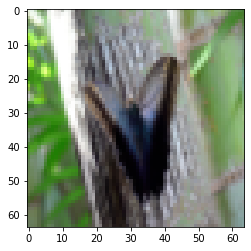

idx(132) y(0) : non-cat


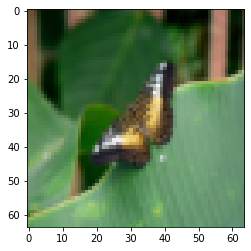

idx(133) y(1) : cat


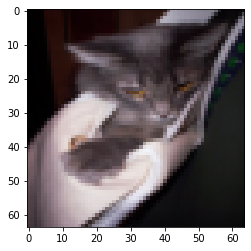

idx(134) y(1) : cat


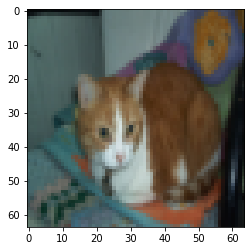

idx(135) y(1) : cat


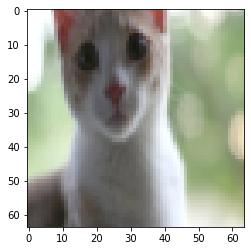

idx(136) y(1) : cat


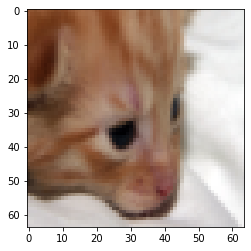

idx(137) y(1) : cat


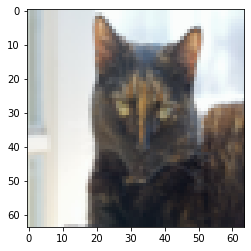

idx(138) y(0) : non-cat


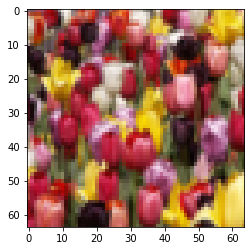

idx(139) y(0) : non-cat


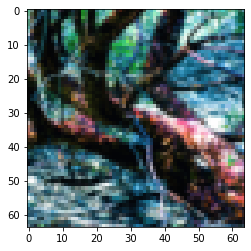

idx(140) y(0) : non-cat


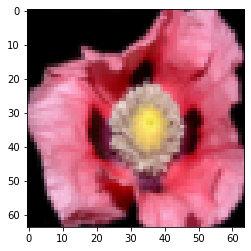

idx(141) y(0) : non-cat


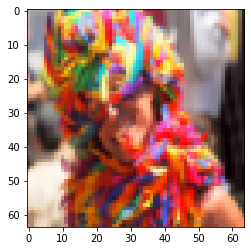

idx(142) y(1) : cat


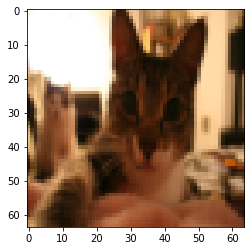

idx(143) y(0) : non-cat


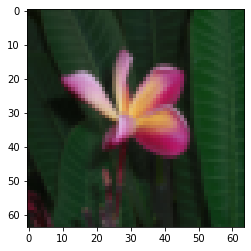

idx(144) y(1) : cat


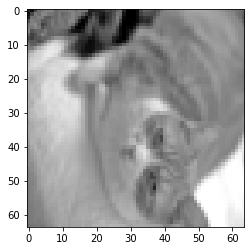

idx(145) y(1) : cat


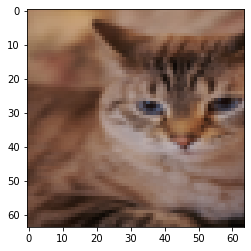

idx(146) y(1) : cat


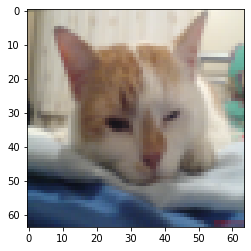

idx(147) y(0) : non-cat


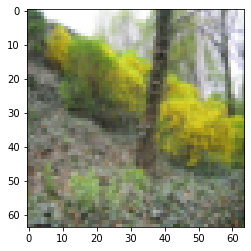

idx(148) y(1) : cat


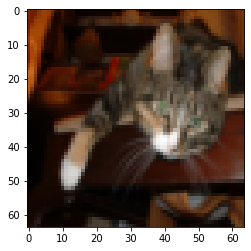

idx(149) y(1) : cat


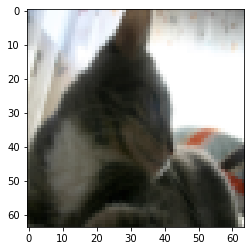

idx(150) y(0) : non-cat


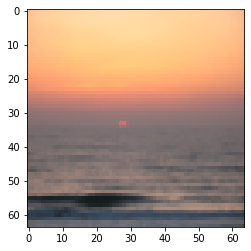

idx(151) y(0) : non-cat


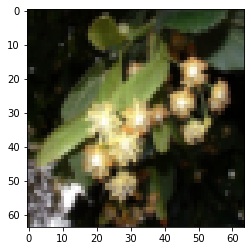

idx(152) y(0) : non-cat


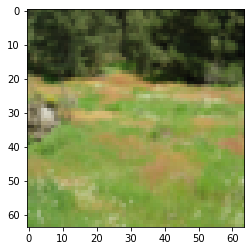

idx(153) y(1) : cat


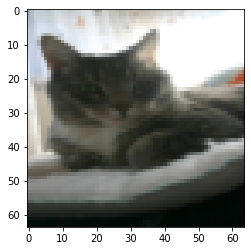

idx(154) y(0) : non-cat


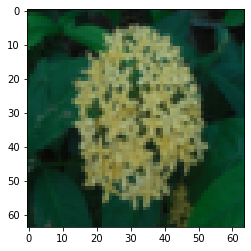

idx(155) y(0) : non-cat


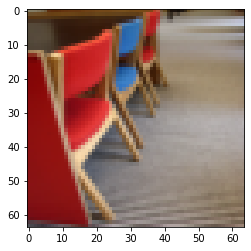

idx(156) y(1) : cat


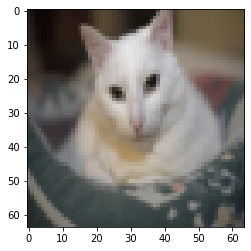

idx(157) y(0) : non-cat


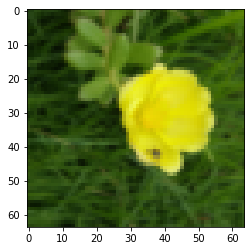

idx(158) y(0) : non-cat


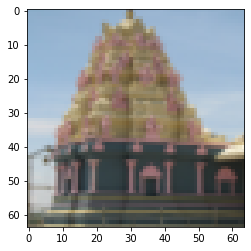

idx(159) y(0) : non-cat


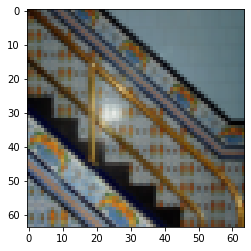

idx(160) y(0) : non-cat


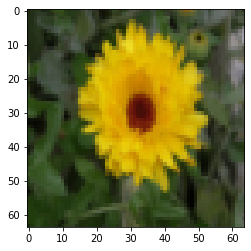

idx(161) y(0) : non-cat


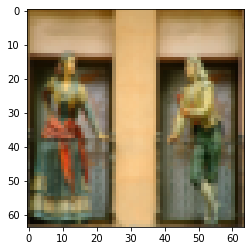

idx(162) y(1) : cat


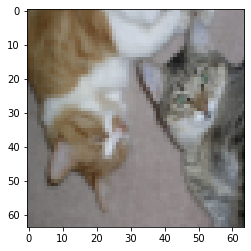

idx(163) y(0) : non-cat


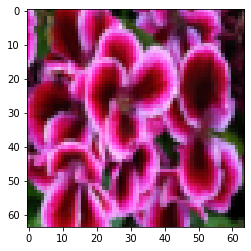

idx(164) y(1) : cat


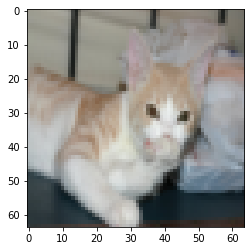

idx(165) y(0) : non-cat


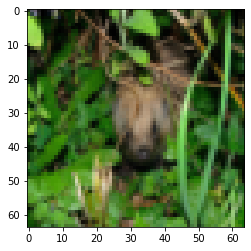

idx(166) y(1) : cat


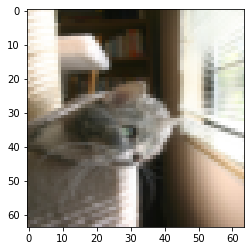

idx(167) y(0) : non-cat


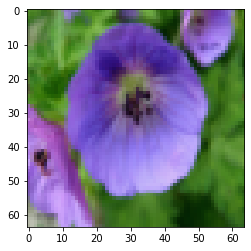

idx(168) y(0) : non-cat


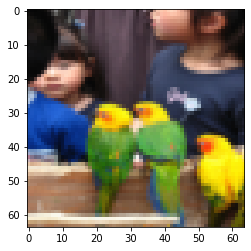

idx(169) y(1) : cat


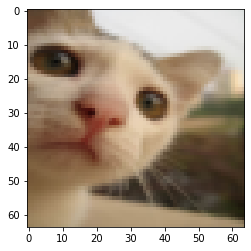

idx(170) y(1) : cat


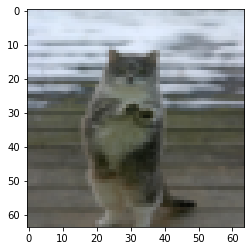

idx(171) y(1) : cat


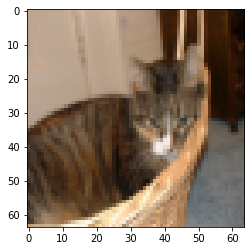

idx(172) y(0) : non-cat


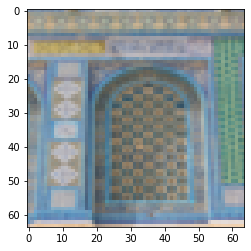

idx(173) y(0) : non-cat


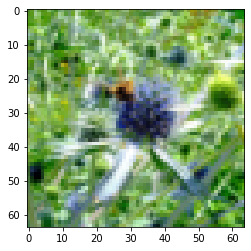

idx(174) y(1) : cat


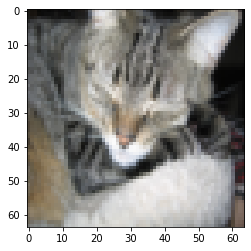

idx(175) y(1) : cat


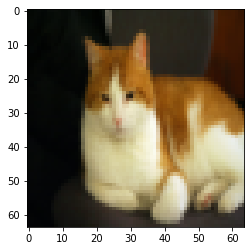

idx(176) y(0) : non-cat


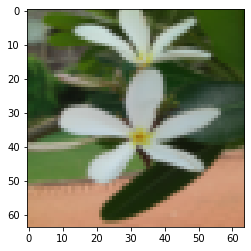

idx(177) y(1) : cat


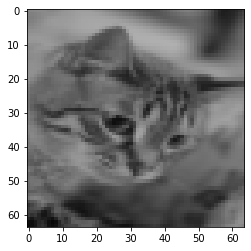

idx(178) y(0) : non-cat


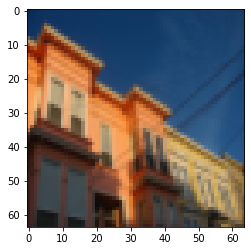

idx(179) y(1) : cat


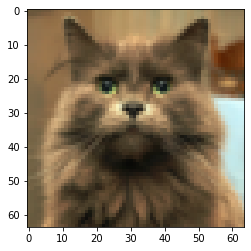

idx(180) y(0) : non-cat


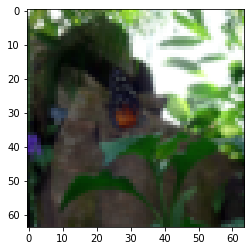

idx(181) y(0) : non-cat


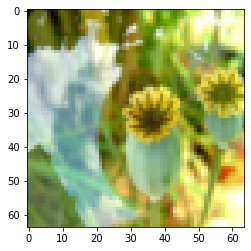

idx(182) y(0) : non-cat


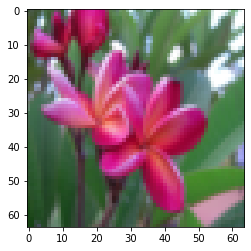

idx(183) y(0) : non-cat


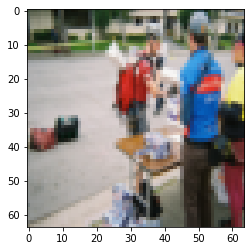

idx(184) y(0) : non-cat


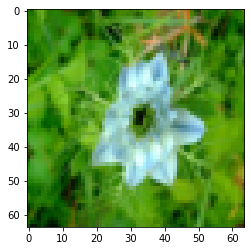

idx(185) y(1) : cat


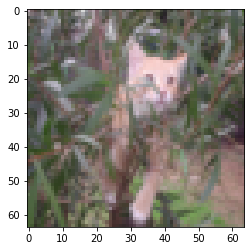

idx(186) y(0) : non-cat


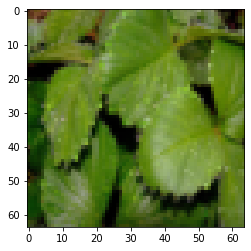

idx(187) y(0) : non-cat


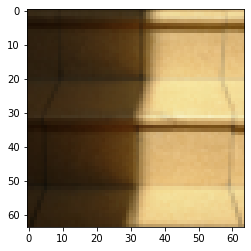

idx(188) y(1) : cat


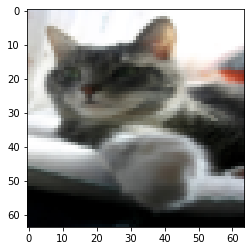

idx(189) y(0) : non-cat


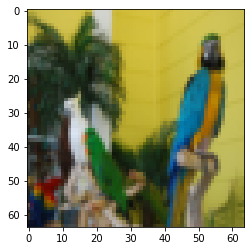

idx(190) y(0) : non-cat


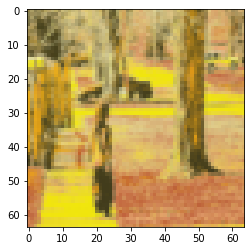

idx(191) y(0) : non-cat


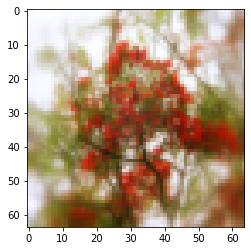

idx(192) y(1) : cat


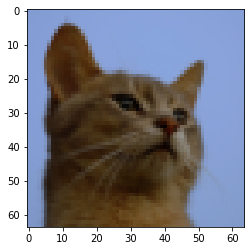

idx(193) y(0) : non-cat


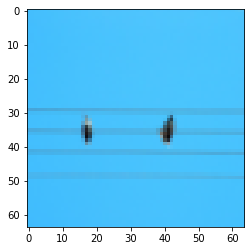

idx(194) y(0) : non-cat


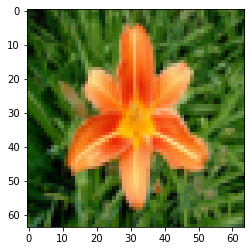

idx(195) y(0) : non-cat


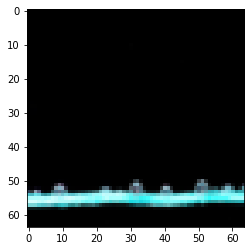

idx(196) y(0) : non-cat


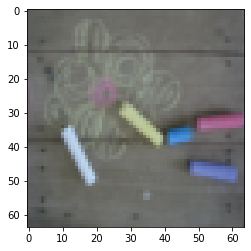

idx(197) y(1) : cat


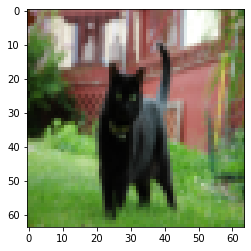

idx(198) y(0) : non-cat


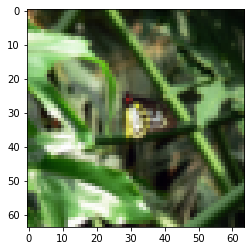

idx(199) y(0) : non-cat


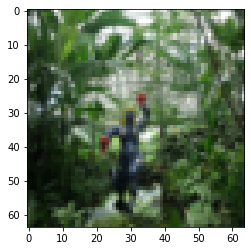

idx(200) y(1) : cat


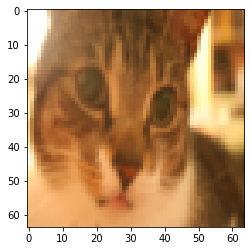

idx(201) y(0) : non-cat


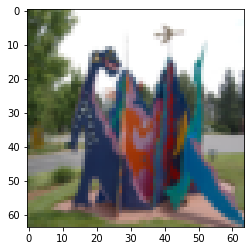

idx(202) y(0) : non-cat


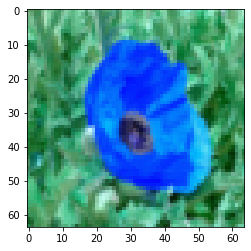

idx(203) y(0) : non-cat


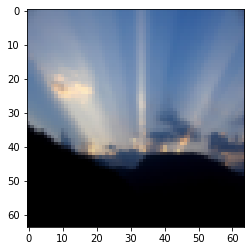

idx(204) y(0) : non-cat


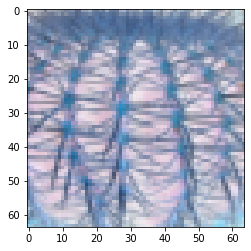

idx(205) y(0) : non-cat


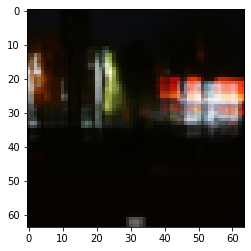

idx(206) y(0) : non-cat


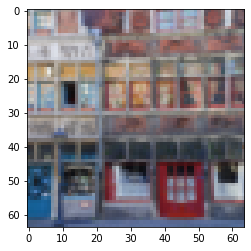

idx(207) y(0) : non-cat


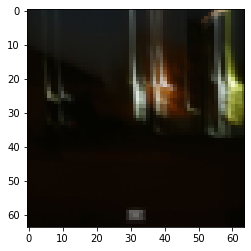

idx(208) y(0) : non-cat


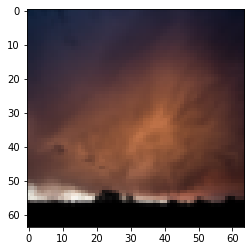

In [7]:
for index in range(len(train_set_x_orig)):
    plt.imshow(train_set_x_orig[index])
    print("idx(" + str(index) +") y("+str(train_set_y_orig[0,index])+") : " + str(classes[train_set_y_orig[0,index]].decode("utf-8")))
    plt.show()

Here are the images from the test set.

idx(0) y(1) : cat


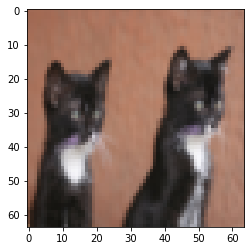

idx(1) y(1) : cat


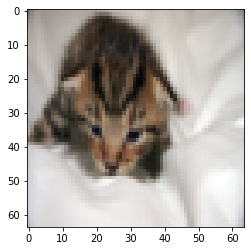

idx(2) y(1) : cat


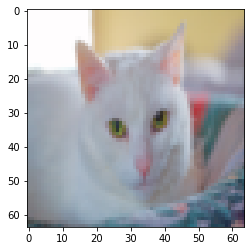

idx(3) y(1) : cat


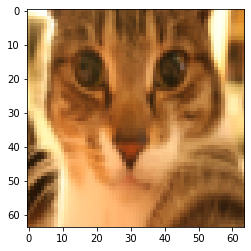

idx(4) y(1) : cat


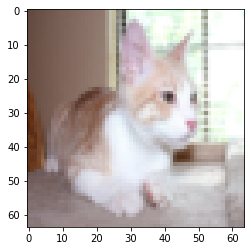

idx(5) y(0) : non-cat


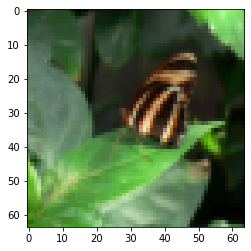

idx(6) y(1) : cat


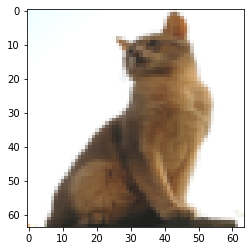

idx(7) y(1) : cat


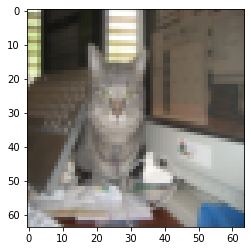

idx(8) y(1) : cat


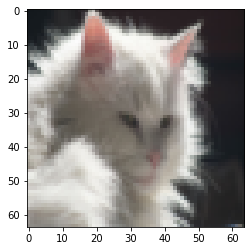

idx(9) y(1) : cat


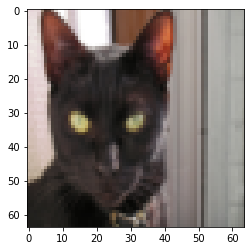

idx(10) y(1) : cat


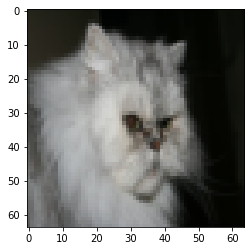

idx(11) y(1) : cat


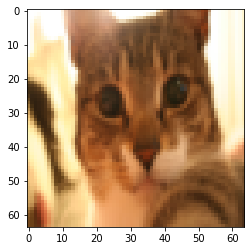

idx(12) y(1) : cat


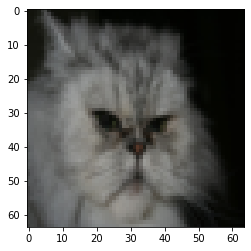

idx(13) y(0) : non-cat


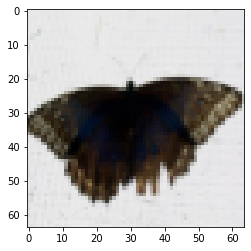

idx(14) y(0) : non-cat


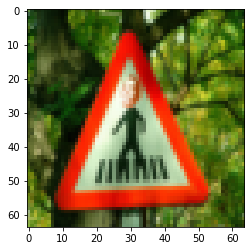

idx(15) y(1) : cat


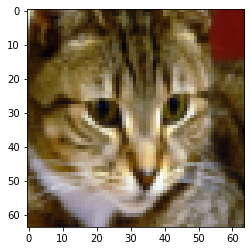

idx(16) y(0) : non-cat


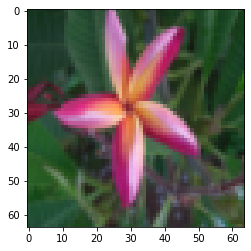

idx(17) y(1) : cat


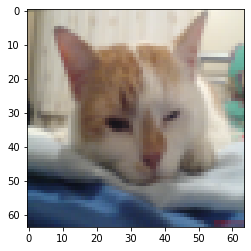

idx(18) y(1) : cat


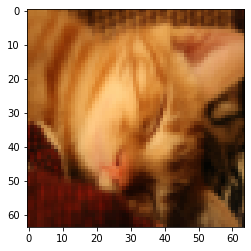

idx(19) y(1) : cat


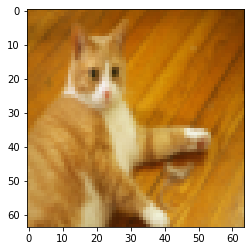

idx(20) y(1) : cat


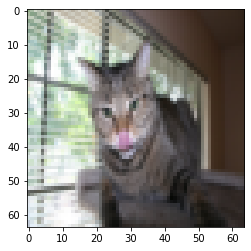

idx(21) y(0) : non-cat


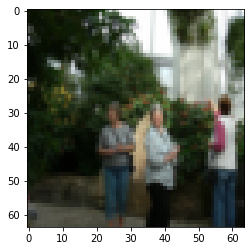

idx(22) y(0) : non-cat


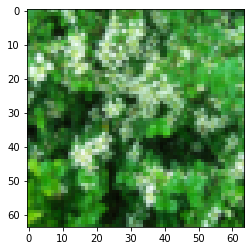

idx(23) y(1) : cat


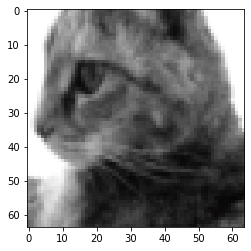

idx(24) y(1) : cat


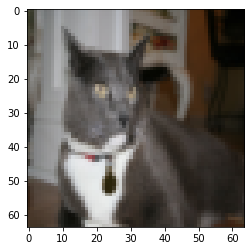

idx(25) y(1) : cat


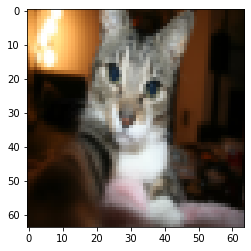

idx(26) y(1) : cat


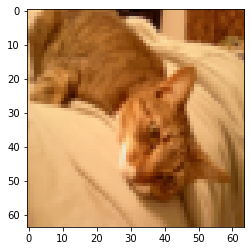

idx(27) y(0) : non-cat


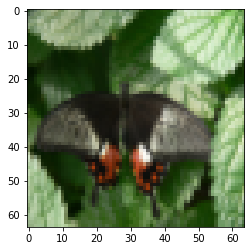

idx(28) y(1) : cat


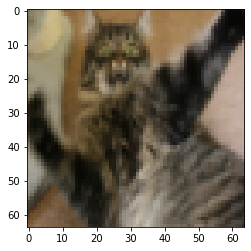

idx(29) y(0) : non-cat


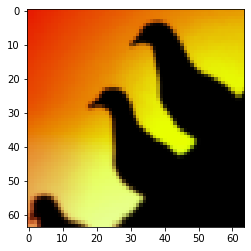

idx(30) y(1) : cat


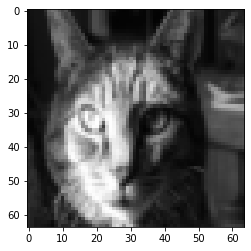

idx(31) y(1) : cat


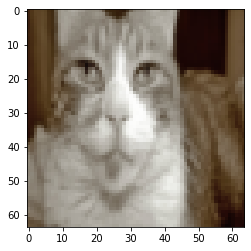

idx(32) y(1) : cat


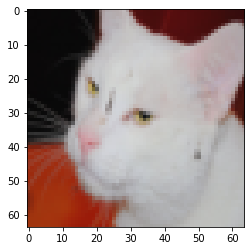

idx(33) y(1) : cat


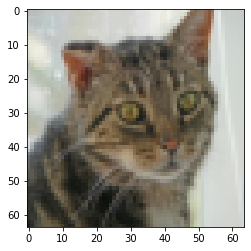

idx(34) y(0) : non-cat


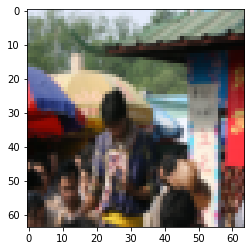

idx(35) y(0) : non-cat


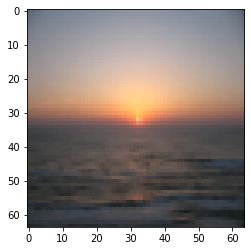

idx(36) y(0) : non-cat


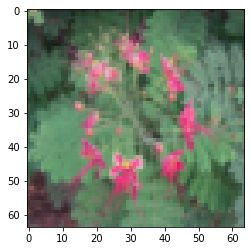

idx(37) y(1) : cat


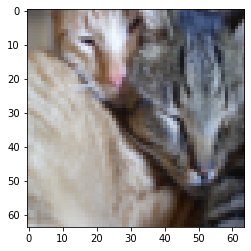

idx(38) y(0) : non-cat


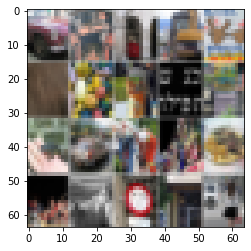

idx(39) y(0) : non-cat


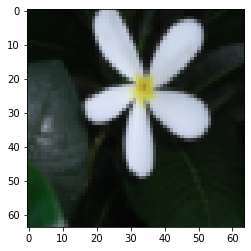

idx(40) y(1) : cat


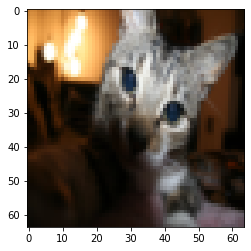

idx(41) y(1) : cat


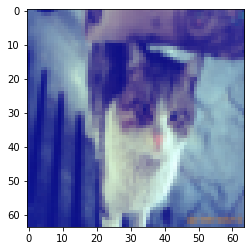

idx(42) y(1) : cat


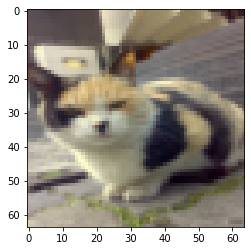

idx(43) y(0) : non-cat


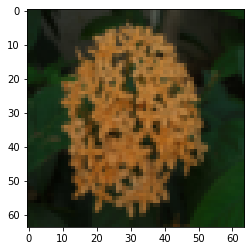

idx(44) y(0) : non-cat


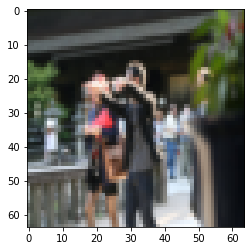

idx(45) y(0) : non-cat


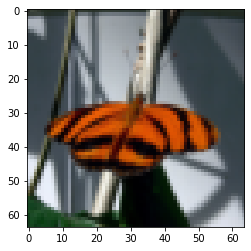

idx(46) y(1) : cat


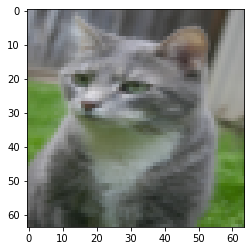

idx(47) y(1) : cat


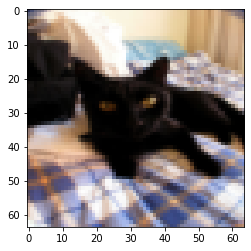

idx(48) y(1) : cat


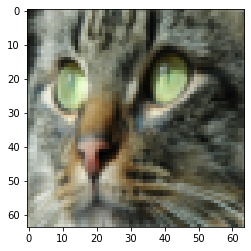

idx(49) y(0) : non-cat


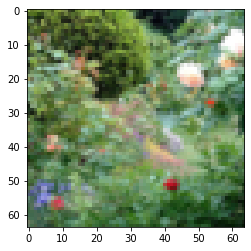

In [8]:
for index in range(len(test_set_x_orig)):
    plt.imshow(test_set_x_orig[index])
    print("idx(" + str(index) +") y("+str(test_set_y_orig[0,index])+") : " + str(classes[test_set_y_orig[0,index]].decode("utf-8")))
    plt.show()

In [17]:
# Standardize data to have feature values between 0 and 1.
train_x = train_set_x_orig/255.
test_x = test_set_x_orig/255.

train_set_y_orig = train_set_y_orig.T
test_set_y_orig = test_set_y_orig.T

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("train_y's shape: " + str(train_set_y_orig.shape))
print ("test_y's shape: " + str(test_set_y_orig.shape))

train_x's shape: (209, 64, 64, 3)
test_x's shape: (50, 64, 64, 3)
train_y's shape: (209, 1)
test_y's shape: (50, 1)


The values of each pixel are normalized to values between 0 and 1.<br><br>
Note that in the Coursera implementation, we were asked to reshape the data such that pixels of each image were asked to form a straight line.<br>
It is not needed in this case because the Tensorflow model can do the reshaping via `tf.keras.layers.Flatten()` API.<br><br>
The shapes suggest that the training set contains 209 images defined by a `64 x 64 x 3` RGB matrices.<br>
On the other hand, the test set contains 50 images defined by the same `64 x 64 x 3` RGB matrices.

## Model Creation

In this example, we attempt to create an L-layer model.  
 <img src="images/LlayerNN_kiank.png" style="width:650px;height:400px;">  
The diagram above was taken from Coursera's `Neural Networks and Deep Learning` course since we are using the same model (but implemented using Tensorflow).

This command is called first to avoid casting of float64 to float32 (Tensorflow warning).

In [18]:
tf.keras.backend.set_floatx('float64')
model_dir = 'models/initial_model'  # used for saving and loading a trained model

Now we use the Sequential() to stack the layers manually.<br>
We flatten the input by just telling the shape to the Sequential model via `tf.keras.layers.Flatten()`.<br>
We use the `Dropout Regularization` to reduce overfitting to the training set.<br>
Finally, we use `tf.keras.layers.Dense()` to define each layer of our model.

In [19]:
def create_stacked_model(model_struct, input_shape, dropout_rate):
    """
    Creates a sequential neural network model
    
    Arguments:
    model_struct -- list of hidden layers as tuples containing the number of nodes and the activation function
                    Example: model_struct = [(20, 'relu'), (1, 'sigmoid')]
    input_shape  -- shape of the input used for flattening
    dropout_rate -- dropout rate for regularization (done in the input only)
    
    Returns:
    model        -- a tensorflow model
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=input_shape),
        tf.keras.layers.Dropout(dropout_rate)
    ])

    for layer_param in model_struct:
        model.add(tf.keras.layers.Dense(layer_param[0], activation=layer_param[1]))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    # final layer for binary classification
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        
    return model

To run the optimization in Tensorflow, we need to choose a loss function and an optimizer.  
Since this is a binary classification problem (cat or not a cat), we should use the `Binary Cross Entropy` as loss function.  
As for the optimization algorithm, we only learned `RMSProp` and `Adam` optimization.  
Here, we will choose `Adam` optimization.  
Note that various hyperparameters can be configured in the optimizers like `beta` values and `learning rate`.

In [20]:
def optimize_binary_classification_model(model, training_samples, training_label, learning_rate, beta_1, beta_2, epsilon):
    """
    Compiles a binary classification neural network model using Adam optimization
    
    Arguments:
    model            -- a tensorflow model
    training_samples -- numpy array of training samples of size m x ... where m is the number of trainings samples
    training_label   -- numpy array of training labels of size m x 1
    learning_rate    -- learning rate during gradient descent (hyperparameter)
    beta_1           -- exponential decay rate for 1st moment (hyperparameter)
    beta_2           -- exponential decay rate for 2nd moment (hyperparameter)
    epsilon          -- small number to avoid dividing by 0 during parameter update (hyperparameter)
    
    Returns:
    model            -- a compiled tensorflow model ready for training
    """
    
    loss_function = tf.keras.losses.BinaryCrossentropy()
    
    predictions = model(training_samples).numpy()
    print('Initial loss is ' + str(loss_function(training_label, predictions).numpy()))
    
    optim = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
    model.compile(optimizer=optim, loss=loss_function, metrics=['accuracy'])
    
    return model

Now that we defined the functions we can use to create a stacked model, we combine the two function to create a model ready for training.

In [21]:
def L_layer_model(model_struct, training_samples, training_label,
                 learning_rate=0.001,
                 dropout_rate=0.2,
                 beta_1=0.9,
                 beta_2=0.999,
                 epsilon=1e-07):
    """
    Creates a sequential tensorflow model for a binary classification problem.
    See create_stacked_model() and optimize_binary_classification_model() functions.
    
    Arguments
    model_struct     -- list of hidden layers as tuples containing the number of nodes and the activation function
                        Example: model_struct = [(20, 'relu'), (1, 'sigmoid')]
    training_samples -- numpy array of training samples of size m x ... where m is the number of trainings samples
    training_label   -- numpy array of training labels of size m x 1
    learning_rate    -- learning rate during gradient descent (hyperparameter)
    dropout_rate     -- dropout rate for regularization (done in the input only)
    beta_1           -- Adam hyperparameter for exponential decay rate for 1st moment
    beta_2           -- Adam hyperparameter for exponential decay rate for 2nd moment
    epsilon          -- Adam hyperparameter for small number to avoid dividing by 0 during parameter update
    
    Returns:
    model            -- a compiled tensorflow model ready for training
    """
        
    model = create_stacked_model(model_struct, training_samples[0].shape, dropout_rate=dropout)
    model = optimize_binary_classification_model(model, training_samples, training_label, learning_rate=learning_rate,
                                                beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
    return model

We are ready to instantiate a model.  
We will also define the values of various hyperparameters here such as:
1. number of hidden layers
2. number of nodes per hidden layer
3. activation function per hidden layer
4. learning rate during gradient descent
5. dropout rate for regularization
6. Adam optimization hyperparameters (default values similar in Coursera's `Improving Deep Networks` class)

The `model_struct` defines the number of nodes and activation function used per layer, and the number of hidden layers.

In [23]:
model_struct = [(20, 'relu'), (7, 'relu'), (5, 'relu')] # hidden layers = number of tuples in the list
learning_rate = 0.0001
dropout = 0.2

model = L_layer_model(model_struct, train_x, train_set_y_orig, learning_rate=learning_rate, dropout_rate=dropout)

Initial loss is 0.6628150939941406


Here we train the model that should decrease the loss per epoch.

In [26]:
history = model.fit(train_x, train_set_y_orig, epochs=2000)
# we can have a dev set here if we use the validation_split argument

Epoch 1/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.6620 - accuracy: 0.5789
Epoch 2/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.6846 - accuracy: 0.6268
Epoch 3/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.6947 - accuracy: 0.6220
Epoch 4/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.6698 - accuracy: 0.6316
Epoch 5/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.6722 - accuracy: 0.6411
Epoch 6/2000
7/7 [==============================] - 0s 22ms/step - loss: 0.6652 - accuracy: 0.6364
Epoch 7/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.6546 - accuracy: 0.6364
Epoch 8/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.6468 - accuracy: 0.6077
Epoch 9/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.6517 - accuracy: 0.6220
Epoch 10/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.6602 - accuracy: 0.6459
Epoch 11/

7/7 [==============================] - 0s 20ms/step - loss: 0.4613 - accuracy: 0.6316
Epoch 163/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.4918 - accuracy: 0.6268
Epoch 164/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.4561 - accuracy: 0.6268
Epoch 165/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.4748 - accuracy: 0.6411
Epoch 166/2000
7/7 [==============================] - 0s 22ms/step - loss: 0.4711 - accuracy: 0.6077
Epoch 167/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.4481 - accuracy: 0.6507
Epoch 168/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.4659 - accuracy: 0.6220
Epoch 169/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.4651 - accuracy: 0.6411
Epoch 170/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.4686 - accuracy: 0.6172
Epoch 171/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.4630 - accuracy: 0.6507
Epoch

7/7 [==============================] - 0s 18ms/step - loss: 0.3924 - accuracy: 0.7943
Epoch 324/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.3728 - accuracy: 0.7751
Epoch 325/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.3990 - accuracy: 0.7847
Epoch 326/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.4048 - accuracy: 0.8134
Epoch 327/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.4028 - accuracy: 0.7464
Epoch 328/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.3729 - accuracy: 0.8469
Epoch 329/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.4113 - accuracy: 0.7560
Epoch 330/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.3924 - accuracy: 0.8134
Epoch 331/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.3809 - accuracy: 0.7943
Epoch 332/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.3802 - accuracy: 0.8086
Epoch

7/7 [==============================] - 0s 18ms/step - loss: 0.3422 - accuracy: 0.8612
Epoch 486/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.3518 - accuracy: 0.8373
Epoch 487/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.3405 - accuracy: 0.8756
Epoch 488/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.3509 - accuracy: 0.8565
Epoch 489/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.3149 - accuracy: 0.9091
Epoch 490/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.3497 - accuracy: 0.8421
Epoch 491/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.3506 - accuracy: 0.8517
Epoch 492/2000
7/7 [==============================] - 0s 16ms/step - loss: 0.3368 - accuracy: 0.8900
Epoch 493/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.3080 - accuracy: 0.9091
Epoch 494/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.3390 - accuracy: 0.8517
Epoch

7/7 [==============================] - 0s 21ms/step - loss: 0.2873 - accuracy: 0.9234
Epoch 646/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.3274 - accuracy: 0.8804
Epoch 647/2000
7/7 [==============================] - 0s 22ms/step - loss: 0.3011 - accuracy: 0.8900
Epoch 648/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.2917 - accuracy: 0.9091
Epoch 649/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.3102 - accuracy: 0.8995
Epoch 650/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.3139 - accuracy: 0.8852
Epoch 651/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.2982 - accuracy: 0.9043
Epoch 652/2000
7/7 [==============================] - 0s 32ms/step - loss: 0.2585 - accuracy: 0.9522
Epoch 653/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.3023 - accuracy: 0.8947
Epoch 654/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.2973 - accuracy: 0.9091
Epoch

7/7 [==============================] - 0s 20ms/step - loss: 0.2383 - accuracy: 0.9522
Epoch 807/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.2356 - accuracy: 0.9569
Epoch 808/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.2629 - accuracy: 0.9330
Epoch 809/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.2696 - accuracy: 0.9091
Epoch 810/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.2870 - accuracy: 0.8947
Epoch 811/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.2706 - accuracy: 0.9139
Epoch 812/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.2809 - accuracy: 0.9091 0s - loss: 0.2304 - accuracy: 0.
Epoch 813/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.2398 - accuracy: 0.9522
Epoch 814/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.2938 - accuracy: 0.8804
Epoch 815/2000
7/7 [==============================] - 0s 23ms/step - loss

7/7 [==============================] - 0s 20ms/step - loss: 0.2570 - accuracy: 0.9139
Epoch 966/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.2684 - accuracy: 0.9091
Epoch 967/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.2595 - accuracy: 0.9187
Epoch 968/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.2456 - accuracy: 0.9330
Epoch 969/2000
7/7 [==============================] - 0s 26ms/step - loss: 0.2549 - accuracy: 0.9187
Epoch 970/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.2461 - accuracy: 0.9282
Epoch 971/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.2678 - accuracy: 0.9139
Epoch 972/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.2368 - accuracy: 0.9378
Epoch 973/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.2562 - accuracy: 0.9282
Epoch 974/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.2573 - accuracy: 0.9139
Epoch

7/7 [==============================] - 0s 20ms/step - loss: 0.2303 - accuracy: 0.9330
Epoch 1126/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.2391 - accuracy: 0.9234
Epoch 1127/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.2201 - accuracy: 0.9474
Epoch 1128/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.2410 - accuracy: 0.9282
Epoch 1129/2000
7/7 [==============================] - 0s 22ms/step - loss: 0.2331 - accuracy: 0.9282
Epoch 1130/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.2567 - accuracy: 0.9043
Epoch 1131/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.2203 - accuracy: 0.9426
Epoch 1132/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.2241 - accuracy: 0.9378
Epoch 1133/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.2333 - accuracy: 0.9330
Epoch 1134/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.2593 - accuracy: 0.9

7/7 [==============================] - 0s 36ms/step - loss: 0.2402 - accuracy: 0.9234
Epoch 1206/2000
7/7 [==============================] - 0s 27ms/step - loss: 0.2219 - accuracy: 0.9378 0s - loss: 0.2270 - accuracy: 
Epoch 1207/2000
7/7 [==============================] - 0s 23ms/step - loss: 0.2708 - accuracy: 0.8947
Epoch 1208/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.2184 - accuracy: 0.9378
Epoch 1209/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.2668 - accuracy: 0.8900
Epoch 1210/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.2385 - accuracy: 0.9234
Epoch 1211/2000
7/7 [==============================] - 0s 28ms/step - loss: 0.2557 - accuracy: 0.9043
Epoch 1212/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.2409 - accuracy: 0.9187
Epoch 1213/2000
7/7 [==============================] - 0s 28ms/step - loss: 0.2570 - accuracy: 0.9043
Epoch 1214/2000
7/7 [==============================] - 0s 22ms/step

7/7 [==============================] - 0s 17ms/step - loss: 0.2338 - accuracy: 0.9187
Epoch 1364/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.2308 - accuracy: 0.9234
Epoch 1365/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.2361 - accuracy: 0.9234
Epoch 1366/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.2272 - accuracy: 0.9378
Epoch 1367/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.2448 - accuracy: 0.9139
Epoch 1368/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.2178 - accuracy: 0.9378
Epoch 1369/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.2302 - accuracy: 0.9234
Epoch 1370/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.2309 - accuracy: 0.9187
Epoch 1371/2000
7/7 [==============================] - 0s 16ms/step - loss: 0.2186 - accuracy: 0.9330
Epoch 1372/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.2199 - accuracy: 0.9

7/7 [==============================] - 0s 16ms/step - loss: 0.1853 - accuracy: 0.9569
Epoch 1523/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.2438 - accuracy: 0.9091
Epoch 1524/2000
7/7 [==============================] - 0s 23ms/step - loss: 0.2394 - accuracy: 0.9091
Epoch 1525/2000
7/7 [==============================] - 0s 23ms/step - loss: 0.2025 - accuracy: 0.9426
Epoch 1526/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.2256 - accuracy: 0.9187
Epoch 1527/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.2128 - accuracy: 0.9330
Epoch 1528/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.2085 - accuracy: 0.9330
Epoch 1529/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.1803 - accuracy: 0.9665
Epoch 1530/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.1905 - accuracy: 0.9522
Epoch 1531/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.1924 - accuracy: 0.9

7/7 [==============================] - 0s 14ms/step - loss: 0.1822 - accuracy: 0.9569
Epoch 1683/2000
7/7 [==============================] - 0s 14ms/step - loss: 0.2044 - accuracy: 0.9378
Epoch 1684/2000
7/7 [==============================] - 0s 14ms/step - loss: 0.1951 - accuracy: 0.9474
Epoch 1685/2000
7/7 [==============================] - 0s 15ms/step - loss: 0.1887 - accuracy: 0.9522
Epoch 1686/2000
7/7 [==============================] - 0s 14ms/step - loss: 0.2132 - accuracy: 0.9282
Epoch 1687/2000
7/7 [==============================] - 0s 14ms/step - loss: 0.2019 - accuracy: 0.9474
Epoch 1688/2000
7/7 [==============================] - 0s 16ms/step - loss: 0.1976 - accuracy: 0.9474
Epoch 1689/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.1913 - accuracy: 0.9522
Epoch 1690/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.1817 - accuracy: 0.9617
Epoch 1691/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.1739 - accuracy: 0.9

7/7 [==============================] - 0s 17ms/step - loss: 0.1787 - accuracy: 0.9522
Epoch 1843/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.1899 - accuracy: 0.9474
Epoch 1844/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.1519 - accuracy: 0.9761
Epoch 1845/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.1812 - accuracy: 0.9474
Epoch 1846/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.1498 - accuracy: 0.9713
Epoch 1847/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.1597 - accuracy: 0.9713
Epoch 1848/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.1632 - accuracy: 0.9665
Epoch 1849/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.1571 - accuracy: 0.9713
Epoch 1850/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.1927 - accuracy: 0.9426
Epoch 1851/2000
7/7 [==============================] - 0s 19ms/step - loss: 0.1771 - accuracy: 0.9

7/7 [==============================] - 0s 23ms/step - loss: 0.1749 - accuracy: 0.9522
Epoch 1923/2000
7/7 [==============================] - 0s 18ms/step - loss: 0.1866 - accuracy: 0.9426
Epoch 1924/2000
7/7 [==============================] - 0s 21ms/step - loss: 0.2133 - accuracy: 0.9378
Epoch 1925/2000
7/7 [==============================] - 0s 23ms/step - loss: 0.1880 - accuracy: 0.9426
Epoch 1926/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.1960 - accuracy: 0.9426
Epoch 1927/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.2081 - accuracy: 0.9187
Epoch 1928/2000
7/7 [==============================] - 0s 20ms/step - loss: 0.1880 - accuracy: 0.9426
Epoch 1929/2000
7/7 [==============================] - 0s 25ms/step - loss: 0.1858 - accuracy: 0.9474
Epoch 1930/2000
7/7 [==============================] - 0s 23ms/step - loss: 0.1434 - accuracy: 0.9809
Epoch 1931/2000
7/7 [==============================] - 0s 24ms/step - loss: 0.1763 - accuracy: 0.9

We can plot the history obtained during training to have a visual representation of loss optimization.

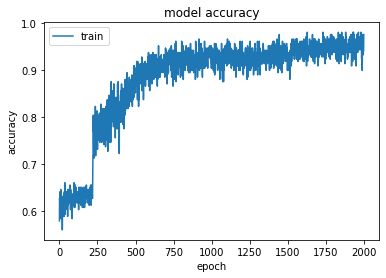

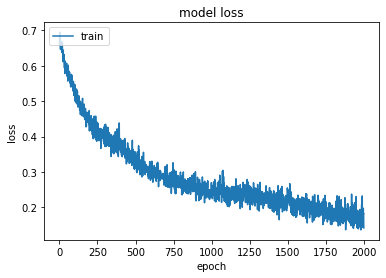

In [27]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Model Evaluation

After training, we use the test set to evaluate the current model.

In [29]:
model.evaluate(test_x,  test_set_y_orig, verbose=1)

2/2 [==============================] - 0s 3ms/step - loss: 4.4438 - accuracy: 0.6200


[4.4438021278381346, 0.62]

The latest model performed well on the training set at <b>97.61%</b> (2000 epoch on 20% dropout).  
However, the model performed OK on the test set at <b>76%</b>.  
This is the best test accuracy we had so far (at the cost of lower training accuracy maybe due to dropout).  
  
Training a model using the same parameters can result to a different model.  
<font color='red'>It will be nice if there is an explanation why running the fitting results in different training performance</font>  
These might be due to (based on my understanding only):
1. Randomized parameter initialization of weights and bias matrices
2. Dropout regularization that has a chance to drop a certain node in a hidden layer to avoid overfitting

Nevertheless, we can save this model which can be loaded.

In [153]:
tf.keras.models.save_model(model, model_dir)

INFO:tensorflow:Assets written to: models\assets


We want to understand why our model performs that way in the test set.<br>
Let's take a look on which images did our model failed to classify.<br><br>

We add the arrays `test_set_prediction` and `test_set_y_orig.T`.<br>
We can find the mislabeled indices if the array containing the sum has values of 1.<br>
Having values of 0 or 2 means that the prediction and original label is the same.<br><br>

Using the information below, machine learning developers can use `manual error analysis` to understand what can we do to improve the model.

idx: 6 predicted: 0 orig: 1


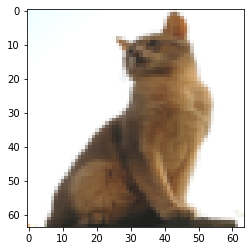

idx: 10 predicted: 0 orig: 1


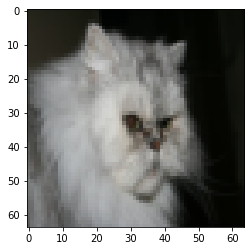

idx: 11 predicted: 0 orig: 1


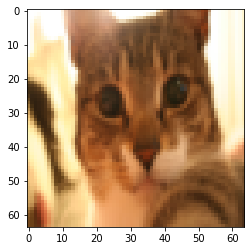

idx: 12 predicted: 0 orig: 1


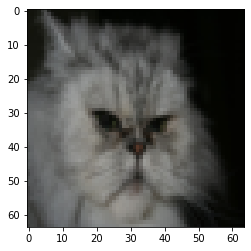

idx: 13 predicted: 1 orig: 0


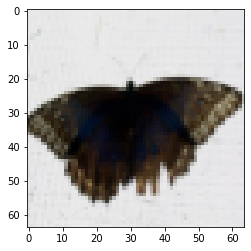

idx: 18 predicted: 0 orig: 1


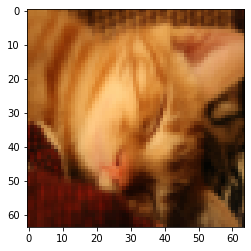

idx: 19 predicted: 0 orig: 1


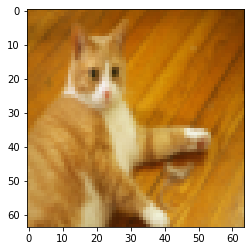

idx: 25 predicted: 0 orig: 1


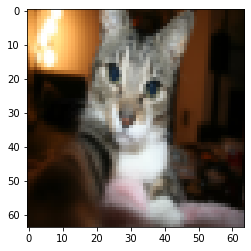

idx: 26 predicted: 0 orig: 1


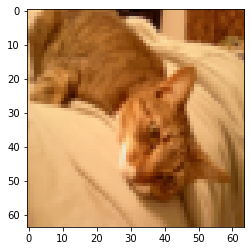

idx: 28 predicted: 0 orig: 1


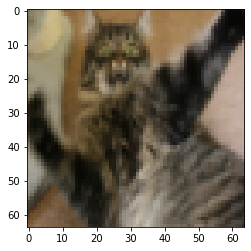

idx: 29 predicted: 1 orig: 0


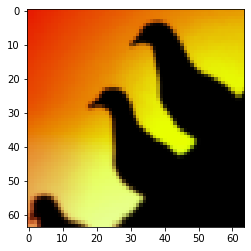

idx: 30 predicted: 0 orig: 1


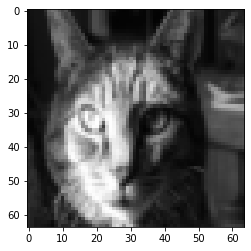

idx: 32 predicted: 0 orig: 1


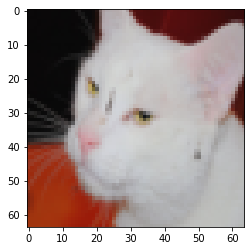

idx: 34 predicted: 1 orig: 0


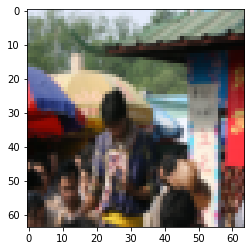

idx: 40 predicted: 0 orig: 1


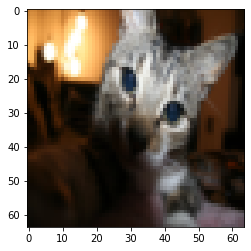

idx: 41 predicted: 0 orig: 1


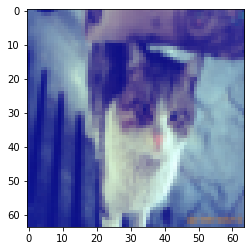

idx: 42 predicted: 0 orig: 1


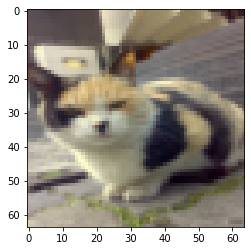

idx: 44 predicted: 1 orig: 0


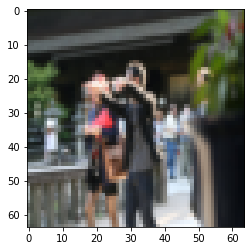

idx: 46 predicted: 0 orig: 1


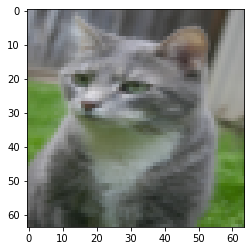

In [33]:
test_set_prediction = model.predict(test_x)
test_set_prediction = (test_set_prediction > 0.5).astype(int)

summer = test_set_prediction + test_set_y_orig
mislabeled_indices = np.asarray(np.where(summer == 1))

num_of_mislabeled = mislabeled_indices.shape[1]
for idx in range(num_of_mislabeled):
    idx_pred = mislabeled_indices[0][idx]
    print('idx: ' + str(idx_pred) + ' predicted: ' + str(test_set_prediction[idx_pred][0]) + ' orig: ' + str(test_set_y_orig[idx_pred][0]))
    plt.imshow(test_set_x_orig[idx_pred])
    plt.show()

## Making Predictions

We will now use the model for making predictions.  
We load a couple of our own test images.  
Note that since the images we are using are `64 x 64 x 3` matrices, we might need to resize the images first.  
  
2 images will be used for checking how the model predicts. 
1. A real cat image (my pet when I was a child)
2. A funny man from Brooklyn 99 TV series

In [7]:
from PIL import Image

own_img_cat_file = "images\mochi64x64.jpg"
own_img_not_cat_file = "images\mlep64x64.jpg"

# open the Image
own_img_cat = Image.open(own_img_cat_file, mode='r')
own_img_not_cat = Image.open(own_img_not_cat_file, mode='r')
# resize if needed, but here I resized the image manually :P

# combine in 1 matrix
own_img_matrix = np.zeros((2, 64, 64, 3)) # 2 RGB images
own_img_matrix[0] = np.array(own_img_cat)
own_img_matrix[1] = np.array(own_img_not_cat)
own_img_matrix /= 255 # normalize values between 0 and 1

# close the Image
own_img_cat.close()
own_img_not_cat.close()

We load the model which was saved after the training and evaluation.

In [9]:
model = tf.keras.models.load_model(model_dir)

Then we feed the matrix to the model for prediction.<br>
The `model.predict()` will give the probability that a certain image is a cat or not a cat.<br>
In the example below, we decice that an image is a cat if the probability is greater than 50%.

The model recognized this as a cat


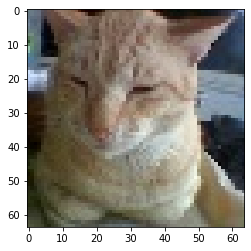

The model did not recognized this as a cat


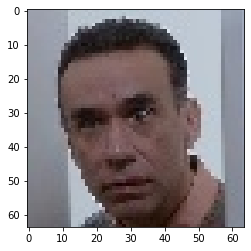

In [15]:
predictions = model.predict(own_img_matrix)

result = predictions > 0.5

for idx in range(predictions.size):
    print('The model ' + ('' if result[idx] else 'did not ') + 'recognized this as a cat')

    plt.imshow(own_img_matrix[idx])
    plt.show()